In [1]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go


#adding all files from the same folder 
folder_path = '/Users/utkugulbardak/Documents/timeseries/datasets/nbaarchive'
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

In [2]:
df_list= [ ]

for file in csv_files:
    file_path = os.path.join(folder_path, file)     
    df= pd.read_csv(file_path)
    df_list.append(df)
    
combined_df = pd.concat(df_list, ignore_index=True)

In [3]:
print(combined_df.columns)

Index(['season', 'lg', 'team', 'abbreviation', 'playoffs', 'g', 'mp',
       'fg_per_100_poss', 'fga_per_100_poss', 'fg_percent',
       ...
       'opp_trb', 'opp_ast', 'opp_stl', 'opp_blk', 'opp_tov', 'opp_pf',
       'opp_pts', 'award', 'first', 'winner'],
      dtype='object', length=238)


In [4]:
players = pd.read_csv('/Users/utkugulbardak/Documents/timeseries/datasets/nbaarchive/player totals.csv')

players.columns

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp', 'fg', 'fga', 'fg_percent',
       'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa', 'x2p_percent',
       'e_fg_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [5]:
# List of columns to drop
columns_to_drop = ['seas_id', 'player_id', 'birth_year', 'age', 'fg', 'fga', 'x3p', 'x3pa', 'x2p', 'x2pa', 'ft', 'fta']

# Drop the columns
players.drop(columns=columns_to_drop, inplace=True)

# Check the result



In [6]:
players.columns

Index(['season', 'player', 'pos', 'experience', 'lg', 'tm', 'g', 'gs', 'mp',
       'fg_percent', 'x3p_percent', 'x2p_percent', 'e_fg_percent',
       'ft_percent', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts'],
      dtype='object')

In [21]:
# Correctly filter the data for seasons from 1992 to 2025
players_filtered = players[players['season'].between(1992, 2025)]

# Check the first few rows of the filtered data
print(players_filtered.head())



   season         player pos  experience   lg   tm  g   gs     mp  fg_percent  \
0    2025     A.J. Green  SG           3  NBA  MIL  5  0.0   36.0       0.455   
1    2025     AJ Johnson  SG           1  NBA  MIL  3  0.0    6.0       0.333   
2    2025   Aaron Gordon  PF          11  NBA  DEN  4  4.0  144.0       0.488   
3    2025  Aaron Holiday  PG           7  NBA  HOU  1  0.0    2.0       0.000   
4    2025  Aaron Nesmith  SF           5  NBA  IND  5  5.0  126.0       0.452   

   ...  ft_percent   orb   drb   trb  ast  stl  blk  tov  pf  pts  
0  ...       1.000   0.0   2.0   2.0    3  1.0  0.0  1.0   1   17  
1  ...         NaN   0.0   1.0   1.0    0  0.0  0.0  0.0   0    2  
2  ...       0.857  13.0  17.0  30.0   14  4.0  2.0  8.0   8   62  
3  ...         NaN   0.0   0.0   0.0    1  0.0  0.0  0.0   0    0  
4  ...       0.846   4.0  19.0  23.0    5  4.0  2.0  4.0  24   43  

[5 rows x 23 columns]


Time Series Aggragation


In [22]:
seasonal_data = players_filtered.groupby('season').agg({
    'fg_percent': 'mean',
    'x3p_percent': 'mean',
    'x2p_percent': 'mean',
    'e_fg_percent': 'mean',
    'ft_percent': 'mean',
    'orb': 'mean',
    'drb': 'mean',
    'trb': 'mean',
    'ast': 'mean',
    'stl': 'mean',
    'blk': 'mean',
    'tov': 'mean',
    'pf': 'mean',
    'pts': 'mean'
  
}).reset_index()

print(seasonal_data)

    season  fg_percent  x3p_percent  x2p_percent  e_fg_percent  ft_percent  \
0     1992    0.449821     0.214507     0.462318      0.462828    0.728494   
1     1993    0.452817     0.215685     0.469013      0.467236    0.722804   
2     1994    0.440891     0.235761     0.453473      0.457563    0.700688   
3     1995    0.437539     0.271132     0.463829      0.467024    0.720436   
4     1996    0.444418     0.278497     0.463980      0.475311    0.710384   
5     1997    0.429037     0.283967     0.447476      0.462051    0.708314   
6     1998    0.429187     0.247660     0.446649      0.455042    0.711150   
7     1999    0.411487     0.254167     0.427440      0.437093    0.704256   
8     2000    0.427391     0.264681     0.445138      0.452632    0.728875   
9     2001    0.421885     0.259759     0.435400      0.446338    0.715311   
10    2002    0.425302     0.263798     0.443256      0.451905    0.719846   
11    2003    0.412745     0.265407     0.429079      0.438230  

Time Series Visuals

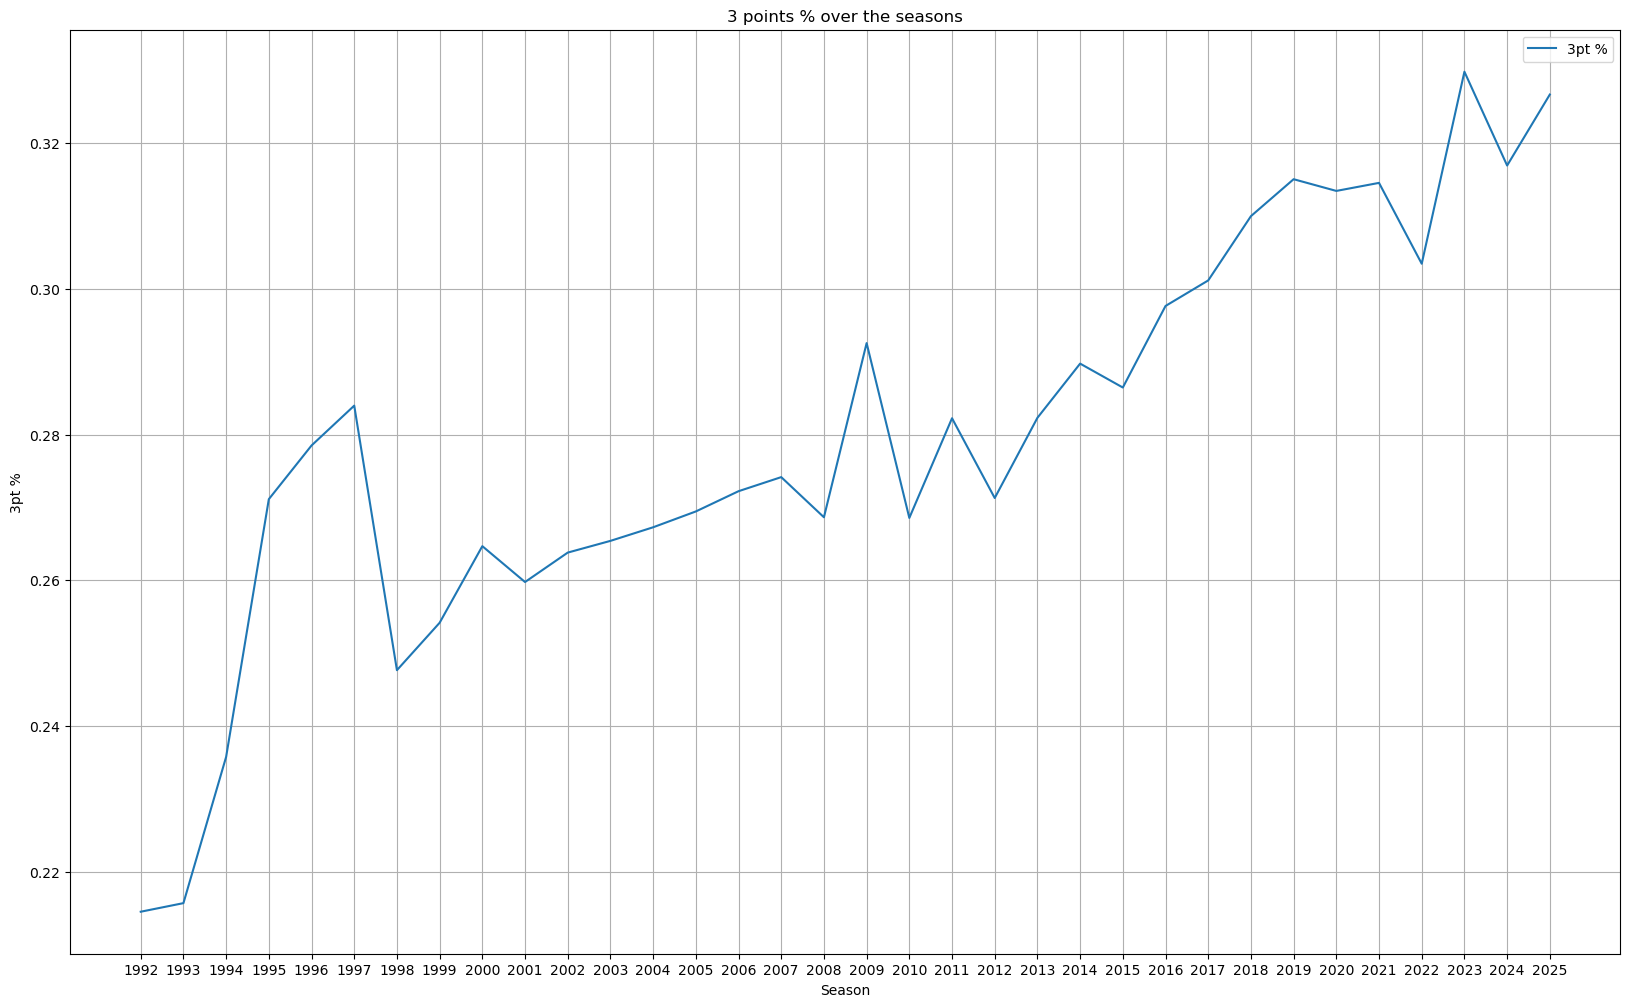

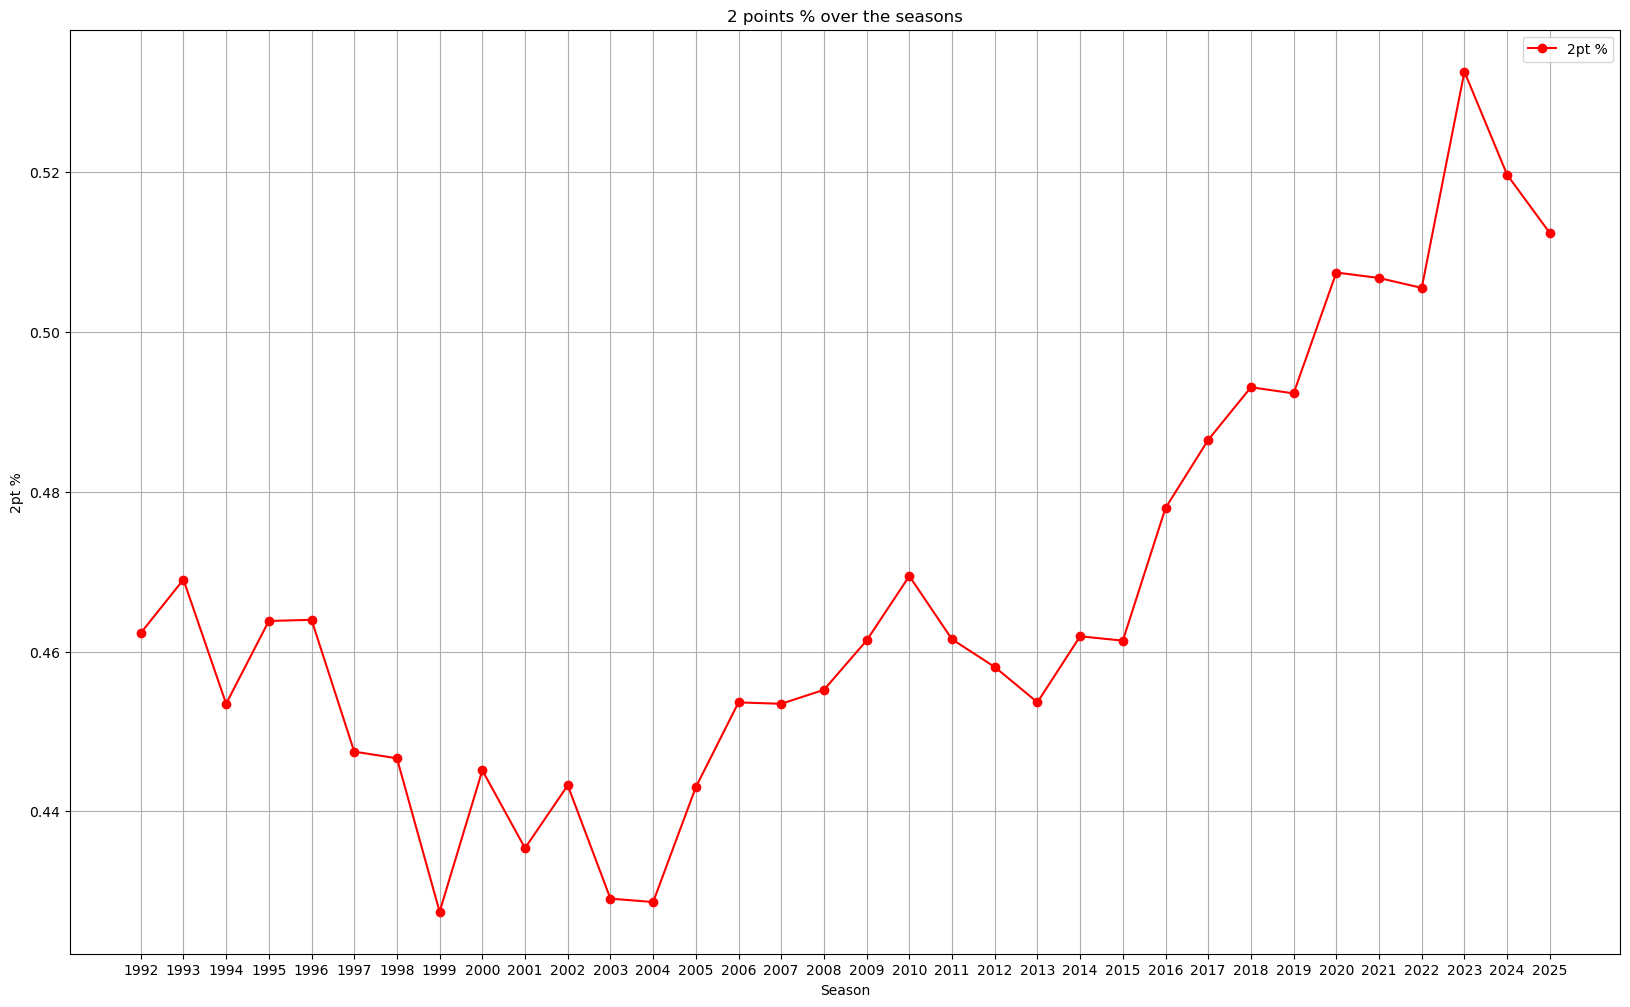

In [35]:
plt.figure(figsize=(20, 12))
plt.plot(seasonal_data['season'], seasonal_data['x3p_percent'], label='3pt %')
plt.title('3 points % over the seasons')
plt.xlabel('Season')
plt.ylabel('3pt %')
plt.xticks(seasonal_data['season'])
plt.grid(True)
plt.legend()
plt.show()  

plt.figure(figsize=(20, 12))
plt.plot(seasonal_data['season'], seasonal_data['x2p_percent'], label='2pt %', marker = 'o', color= 'red')
plt.title('2 points % over the seasons')
plt.xlabel('Season')
plt.ylabel('2pt %')
plt.xticks(seasonal_data['season'])
plt.grid(True)
plt.legend()
plt.show()


Trend Analysis using Rolling Mean

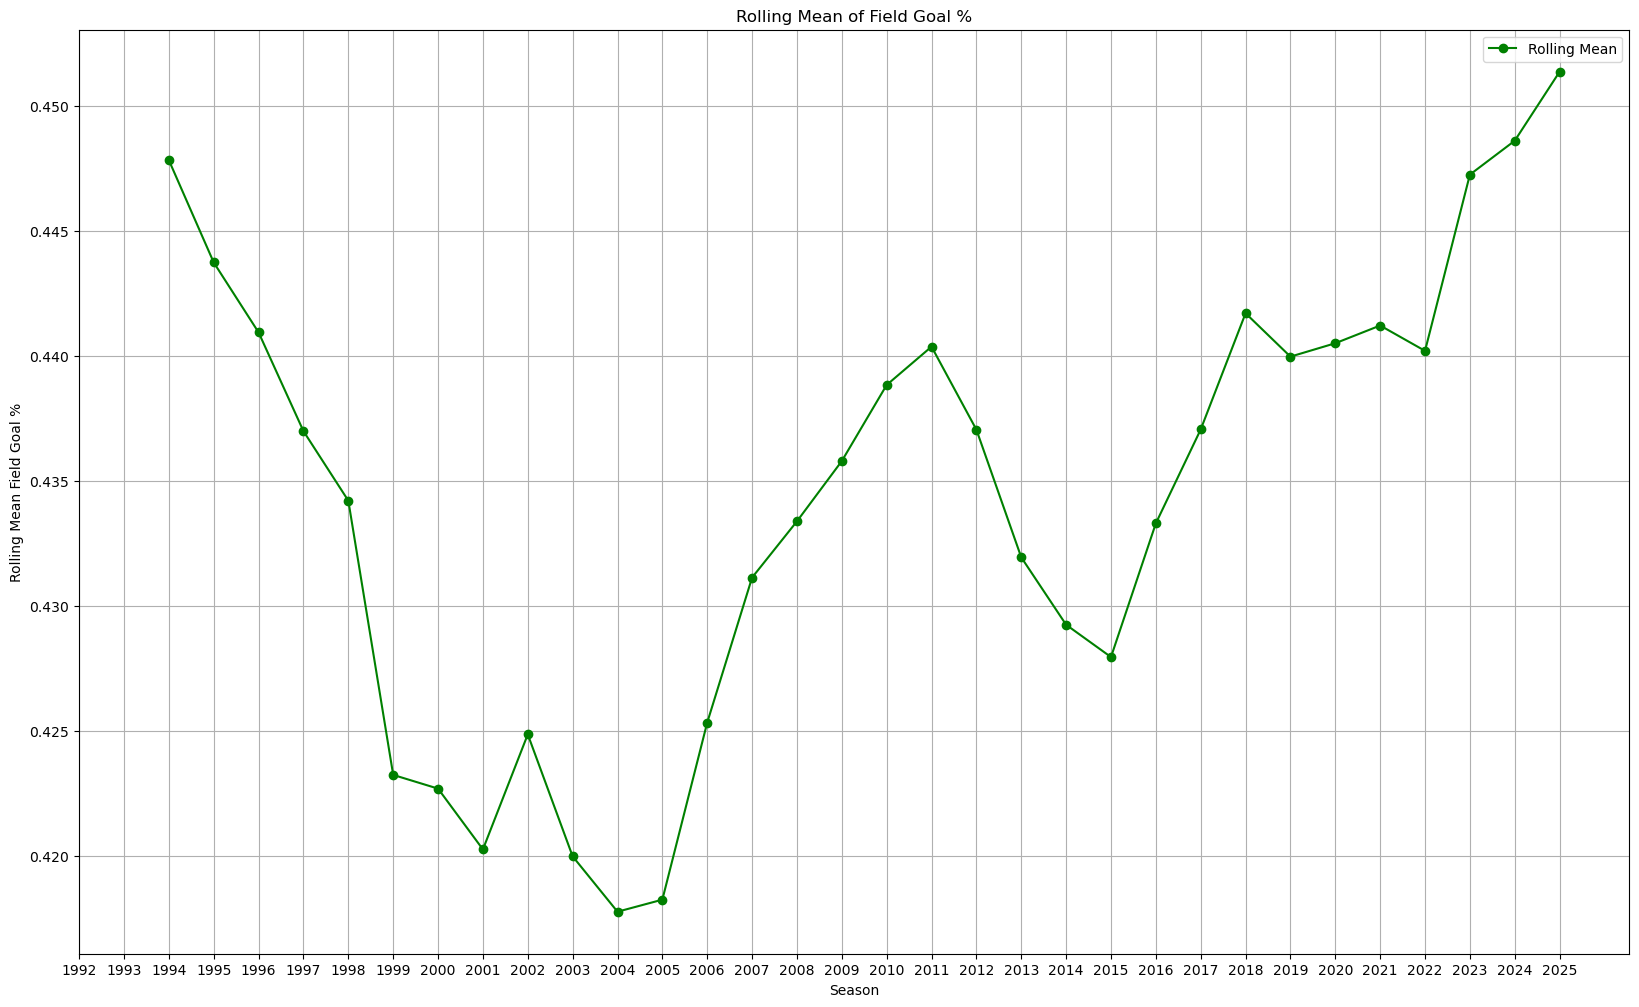

In [36]:
seasonal_data['fg_percent_rolling'] = seasonal_data['fg_percent'].rolling(window=3).mean()

plt.figure(figsize=(20, 12))
plt.plot(seasonal_data['season'],seasonal_data['fg_percent_rolling'],label = 'Rolling Mean', marker = 'o', color= 'green')
plt.title('Rolling Mean of Field Goal %')
plt.xlabel('Season')
plt.ylabel('Rolling Mean Field Goal %')
plt.xticks(seasonal_data['season'])
plt.grid(True)
plt.legend()
plt.show()


In [25]:
# Calculate the points per game (PPG) per player
players_filtered['pts_per_minute'] = players_filtered['pts'] / players_filtered['mp']

players_filtered['pts_per_36_min'] = players_filtered['pts_per_minute'] * 36

# Check the updated DataFrame
print(players_filtered[['player', 'season', 'pts', 'mp', 'pts_per_minute', 'pts_per_36_min']].head())

# Group the data by player and season and calculate the average points per 36 minutes
players_grouped = players_filtered.groupby(['player', 'season']).agg({
    'pts_per_36_min': 'mean'
}).reset_index()

players_grouped.columns

          player  season  pts     mp  pts_per_minute  pts_per_36_min
0     A.J. Green    2025   17   36.0        0.472222       17.000000
1     AJ Johnson    2025    2    6.0        0.333333       12.000000
2   Aaron Gordon    2025   62  144.0        0.430556       15.500000
3  Aaron Holiday    2025    0    2.0        0.000000        0.000000
4  Aaron Nesmith    2025   43  126.0        0.341270       12.285714


/var/folders/7t/gk_qv83x7jzdycfbpkl_k40r0000gn/T/ipykernel_1136/2438323257.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/7t/gk_qv83x7jzdycfbpkl_k40r0000gn/T/ipykernel_1136/2438323257.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Index(['player', 'season', 'pts_per_36_min'], dtype='object')

Forecasting of 2025 season according to last 10 seasons 

forecasyed points for 2025 season: {forecast[0]}


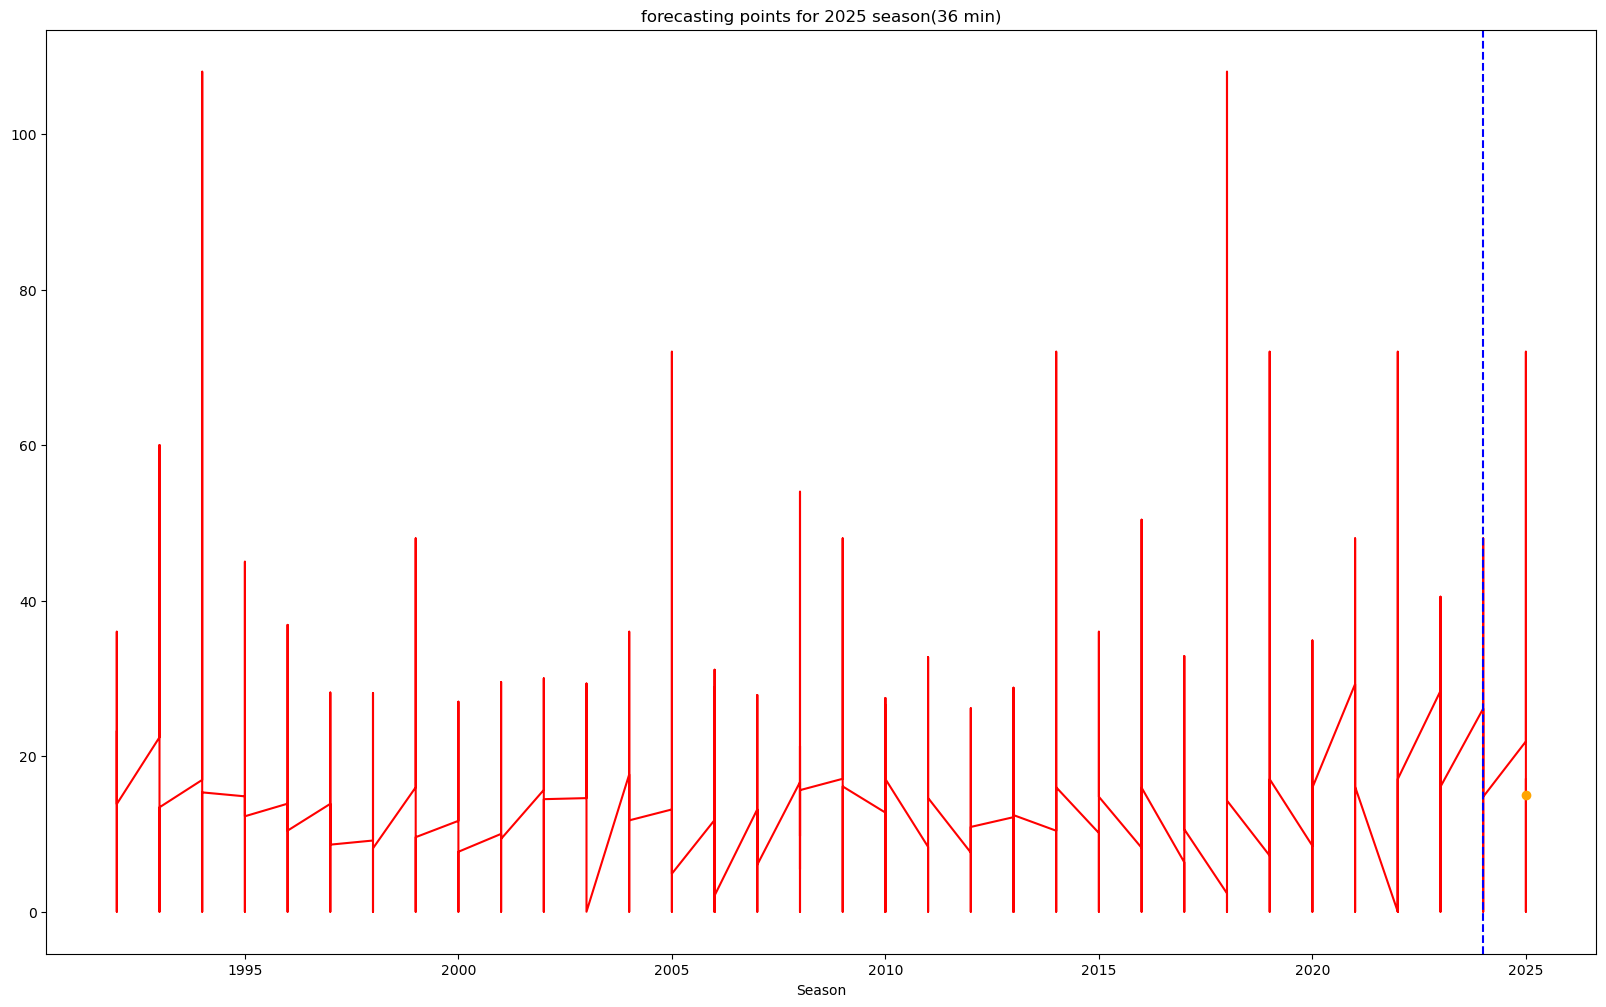

In [37]:
model = ARIMA(players_filtered['pts_per_36_min'], order=(1,1,1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=1)

plt.figure(figsize=(20, 12))
plt.plot(players_filtered['season'], players_filtered['pts_per_36_min'], label='Historical data', color= 'red')
plt.axvline(x = 2024, color = 'blue', linestyle = '--', label = 'Forecast starts')
plt.plot([2025], forecast, label = 'forecast points for 2025', marker = 'o', color = 'orange')
plt.title('forecasting points for 2025 season(36 min)')
plt.xlabel('Season')

print('forecasyed points for 2025 season: {forecast[0]}')


In [27]:
# plt.figure(figsize=(16, 10))

# for player in players_grouped['player'].unique():
#     player_data = players_grouped[players_grouped['player'] == player]
#     plt.plot(player_data['season'], player_data['pts_per_36_min'], label=player)
    
# plt.title('Points per 36 minutes for different players over the seasons', fontsize=16)  
# plt.xlabel('Season', fontsize=14)
# plt.ylabel('Points per 36 minutes', fontsize=14)
# plt.xticks(players_grouped['season'].unique(), rotation=45) 

# plt.legend(loc ='upper left', bbox_to_anchor=(1.05,1), fontsize=8, title= 'players')
# plt.tight_layout()
# plt.show()
    

In [28]:
# # Set up subplots for each season
# unique_seasons = players_grouped['season'].unique()
# fig, axes = plt.subplots(len(unique_seasons), 1, figsize=(12, len(unique_seasons) * 4), sharex=True)

# for i, season in enumerate(unique_seasons):
#     ax = axes[i]
#     season_data = players_grouped[players_grouped['season'] == season]
#     ax.scatter(season_data['player'], season_data['pts_per_36_min'], alpha=0.7, color='orange')
#     ax.set_title(f'Points per 36 Minutes for {season}', fontsize=14)
#     ax.set_ylabel('Points per 36 Minutes', fontsize=12)
#     ax.set_xticks(range(len(season_data['player'])))
#     ax.set_xticklabels(season_data['player'], rotation=90, fontsize=10)

# plt.xlabel('Players', fontsize=12)
# plt.tight_layout()
# plt.show()


Because there are too many players in the graph, i will filter them not only by season but also in different ways 

In [29]:
# # Group by player position (example: 'pg' for point guard, 'sg' for shooting guard, etc.)
# position_groups = players_filtered.groupby('pos')

# # For each position, you can create a separate plot
# for pos, group in position_groups:
#     plt.figure(figsize=(16, 8))
#     for player in group['player'].unique():
#         player_data = group[group['player'] == player]
#         plt.scatter(player_data['season'], player_data['pts_per_36_min'], label=player, alpha=0.7)
    
#     plt.title(f'Points per 36 Minutes by Player for Position: {pos}', fontsize=16)
#     plt.xlabel('Season', fontsize=14)
#     plt.ylabel('Points per 36 Minutes', fontsize=14)
#     plt.xticks(group['season'].unique(), rotation=45)
#     plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=8, title='Players')
#     plt.tight_layout()
#     plt.show()


In [30]:
# # Filter rookies and veterans
# rookies = players_filtered[players_filtered['experience'] <= 3]
# veterans = players_filtered[players_filtered['experience'] >= 5]

# # Plot rookies
# plt.figure(figsize=(16, 8))
# for player in rookies['player'].unique():
#     player_data = rookies[rookies['player'] == player]
#     plt.scatter(player_data['season'], player_data['pts_per_36_min'], label=player, alpha=0.7)
# plt.title('Points per 36 Minutes for Rookies', fontsize=16)
# plt.xlabel('Season', fontsize=14)
# plt.ylabel('Points per 36 Minutes', fontsize=14)
# plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=8, title='Players')
# plt.tight_layout()
# plt.show()

# # Plot veterans
# plt.figure(figsize=(16, 8))
# for player in veterans['player'].unique():
#     player_data = veterans[veterans['player'] == player]
#     plt.scatter(player_data['season'], player_data['pts_per_36_min'], label=player, alpha=0.7)
# plt.title('Points per 36 Minutes for Veterans', fontsize=16)
# plt.xlabel('Season', fontsize=14)
# plt.ylabel('Points per 36 Minutes', fontsize=14)
# plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=8, title='Players')
# plt.tight_layout()
# plt.show()


In [31]:
import plotly.graph_objects as go

# Filter data for the 2024 season and players with mp > 15
season_2024_data = players_filtered[(players_filtered['season'] == 2024) & (players_filtered['mp'] > 200)]

# Group by team
teams = season_2024_data['tm'].unique()

# Loop through each team and create a plot
for team in teams:
    team_data = season_2024_data[season_2024_data['tm'] == team]
    
    # Create a figure
    fig = go.Figure()
    
    # Add scatter points for each player in the team
    for player in team_data['player'].unique():
        player_data = team_data[team_data['player'] == player]
        fig.add_trace(go.Scatter(
            x=[player],  # Player name on x-axis
            y=player_data['pts_per_36_min'],  # Points per 36 minutes on y-axis
            mode='markers',
            name=player,
            text=player_data.apply(lambda row: f'Player: {row["player"]}<br>Team: {row["tm"]}<br>Minutes Played: {row["mp"]}<br>Points per 36 Min: {row["pts_per_36_min"]}', axis=1),
            hoverinfo='text',  # Show hover text
            marker=dict(size=12, opacity=0.8)  # Customize marker size and opacity
        ))
    
    # Update layout
    fig.update_layout(
        title=f'Points per 36 Minutes for {team} Players (Season: 2024, MP > 15)',
        xaxis_title='Player',
        yaxis_title='Points per 36 Minutes',
        xaxis=dict(type='category'),  # Show player names clearly on x-axis
        hovermode='closest',
        showlegend=True,
        legend_title='Players',
        template='plotly_dark',
        height=800,
        width=1500
    )
    
    # Show the plot
    fig.show()


In [32]:
# # Filter for players with pts_per_36_min greater than a threshold (e.g., 15 points)
# high_scorers = players_filtered[players_filtered['pts_per_36_min'] > 15]

# # Plot high scorers
# plt.figure(figsize=(16, 8))
# for player in high_scorers['player'].unique():
#     player_data = high_scorers[high_scorers['player'] == player]
#     plt.scatter(player_data['season'], player_data['pts_per_36_min'], label=player, alpha=0.7)
# plt.title('Points per 36 Minutes for High Scorers', fontsize=16)
# plt.xlabel('Season', fontsize=14)
# plt.ylabel('Points per 36 Minutes', fontsize=14)
# plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=8, title='Players')
# plt.tight_layout()
# plt.show()


In [33]:
import plotly.graph_objects as go

# Filter for players who played more than 200 minutes and have pts_per_36_min greater than 15
filtered_players = players_filtered[(players_filtered['mp'] > 200) & (players_filtered['pts_per_36_min'] > 15)]

# Get unique seasons from the filtered data
seasons = filtered_players['season'].unique()

# Loop through each season and create a separate plot
for season in seasons:
    season_data = filtered_players[filtered_players['season'] == season]
    fig = go.Figure()

    # Group by player position for the current season
    position_groups = season_data.groupby('pos')

    # Add scatter points for each player in the current season
    for pos, group in position_groups:
        for player in group['player'].unique():
            player_data = group[group['player'] == player]
            fig.add_trace(go.Scatter(
                x=[player_data['player'].iloc[0]],  # Player name on x-axis
                y=player_data['pts_per_36_min'],   # Points per 36 minutes on y-axis
                mode='markers',
                name=player,
                text=player_data.apply(lambda row: f'Player: {row["player"]}<br>Season: {row["season"]}<br>Points per 36 Min: {row["pts_per_36_min"]}', axis=1),
                hoverinfo='text',  # Show the text on hover
                marker=dict(size=10, opacity=0.8)
            ))

    # Update layout for the current season
    fig.update_layout(
        title=f'Points per 36 Minutes by Player and Position (Season: {season})',
        xaxis_title='Player',
        yaxis_title='Points per 36 Minutes',
        hovermode='closest',
        showlegend=True,
        legend_title='Players',
        template='plotly_dark',
        height=700,
        width=1800
    )

    # Show the plot for the current season
    fig.show()
